# 📈 Статистический анализ: корреляции и множественная регрессия для ЛПВП  
*(Проверка значимости, сравнение Пирсона/Спирмена, анализ остатков, гендерная стратификация)*

> **Цель блока**: Выявить ключевые предикторы уровня **липопротеинов высокой плотности (ЛПВП)** с помощью корреляционного и регрессионного анализа, оценить статистическую значимость связей и проверить гипотезу о различиях в детерминантах ЛПВП у мужчин и женщин.


## Корреляционный анализ (Пирсон и Спирмен)

In [ ]:
# Работа с данными
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Математика и статистика
from scipy import stats

# Машинное обучение
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
)

In [ ]:
df

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,0,8
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,1,4
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,0,8
3,0,13.0,1,0,7,0.68,0,4.9,1,3.25,...,11,0,10.0,3,31.6,0,85.000523,136.065663,1,8
4,0,16.0,0,1,6,1.01,0,8.2,1,1.25,...,11,0,0.0,3,32.8,1,799.076099,72.024040,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0,18.0,1,1,6,0.90,0,4.6,0,0.75,...,10,0,20.0,4,27.1,0,799.091843,72.006723,0,8
945,0,26.0,1,0,7,1.24,0,4.3,0,0.57,...,9,0,10.0,3,26.0,0,799.095093,136.059485,0,10
946,0,20.0,0,0,8,1.01,1,5.9,1,3.54,...,10,0,10.0,3,27.8,0,799.057712,89.073887,1,10
947,0,21.0,1,0,8,1.74,0,4.6,0,0.63,...,11,0,0.0,5,23.1,0,85.035712,35.003244,0,9


In [ ]:
corr_pearson = df.corr(numeric_only=True, method='pearson')
corr_pearson.round(2)

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
Бронхиальная астма,1.00,-0.01,-0.06,0.03,-0.02,-0.01,0.06,0.07,0.08,0.04,...,0.03,0.23,-0.09,-0.11,0.07,0.00,0.01,-0.04,0.08,-0.04
Возраст алког,-0.01,1.00,-0.09,-0.04,-0.09,0.04,0.08,0.08,0.04,0.08,...,0.03,0.00,-0.21,-0.04,0.06,0.03,0.04,0.04,0.04,-0.11
Работа,-0.06,-0.09,1.00,-0.06,-0.16,0.07,-0.74,-0.19,-0.19,-0.13,...,-0.04,0.00,0.08,0.14,-0.19,-0.24,-0.03,0.08,-0.22,-0.11
Переломы,0.03,-0.04,-0.06,1.00,-0.01,-0.15,0.07,0.11,0.08,0.08,...,0.01,0.07,0.07,-0.08,0.12,0.01,-0.02,-0.08,0.12,-0.02
Время пробуждения,-0.02,-0.09,-0.16,-0.01,1.00,0.04,0.10,-0.01,0.02,-0.02,...,0.30,-0.10,-0.05,0.05,-0.03,0.04,0.06,-0.02,0.00,0.67
ЛПВП,-0.01,0.04,0.07,-0.15,0.04,1.00,-0.09,-0.45,-0.55,-0.78,...,-0.03,-0.03,-0.28,0.17,-0.57,-0.06,0.01,0.13,-0.58,0.06
Выход на пенсию,0.06,0.08,-0.74,0.07,0.10,-0.09,1.00,0.22,0.23,0.14,...,0.01,-0.00,-0.13,-0.12,0.22,-0.07,0.05,-0.06,0.25,0.08
Холестерин,0.07,0.08,-0.19,0.11,-0.01,-0.45,0.22,1.00,0.73,0.44,...,-0.07,0.07,-0.05,-0.05,0.62,0.07,0.06,-0.05,0.79,0.04
Артериальная гипертония,0.08,0.04,-0.19,0.08,0.02,-0.55,0.23,0.73,1.00,0.56,...,-0.00,0.05,-0.08,-0.06,0.70,0.06,0.08,-0.05,0.88,0.02
Триглицериды,0.04,0.08,-0.13,0.08,-0.02,-0.78,0.14,0.44,0.56,1.00,...,0.01,0.03,-0.05,-0.07,0.43,0.04,0.07,-0.03,0.56,-0.03


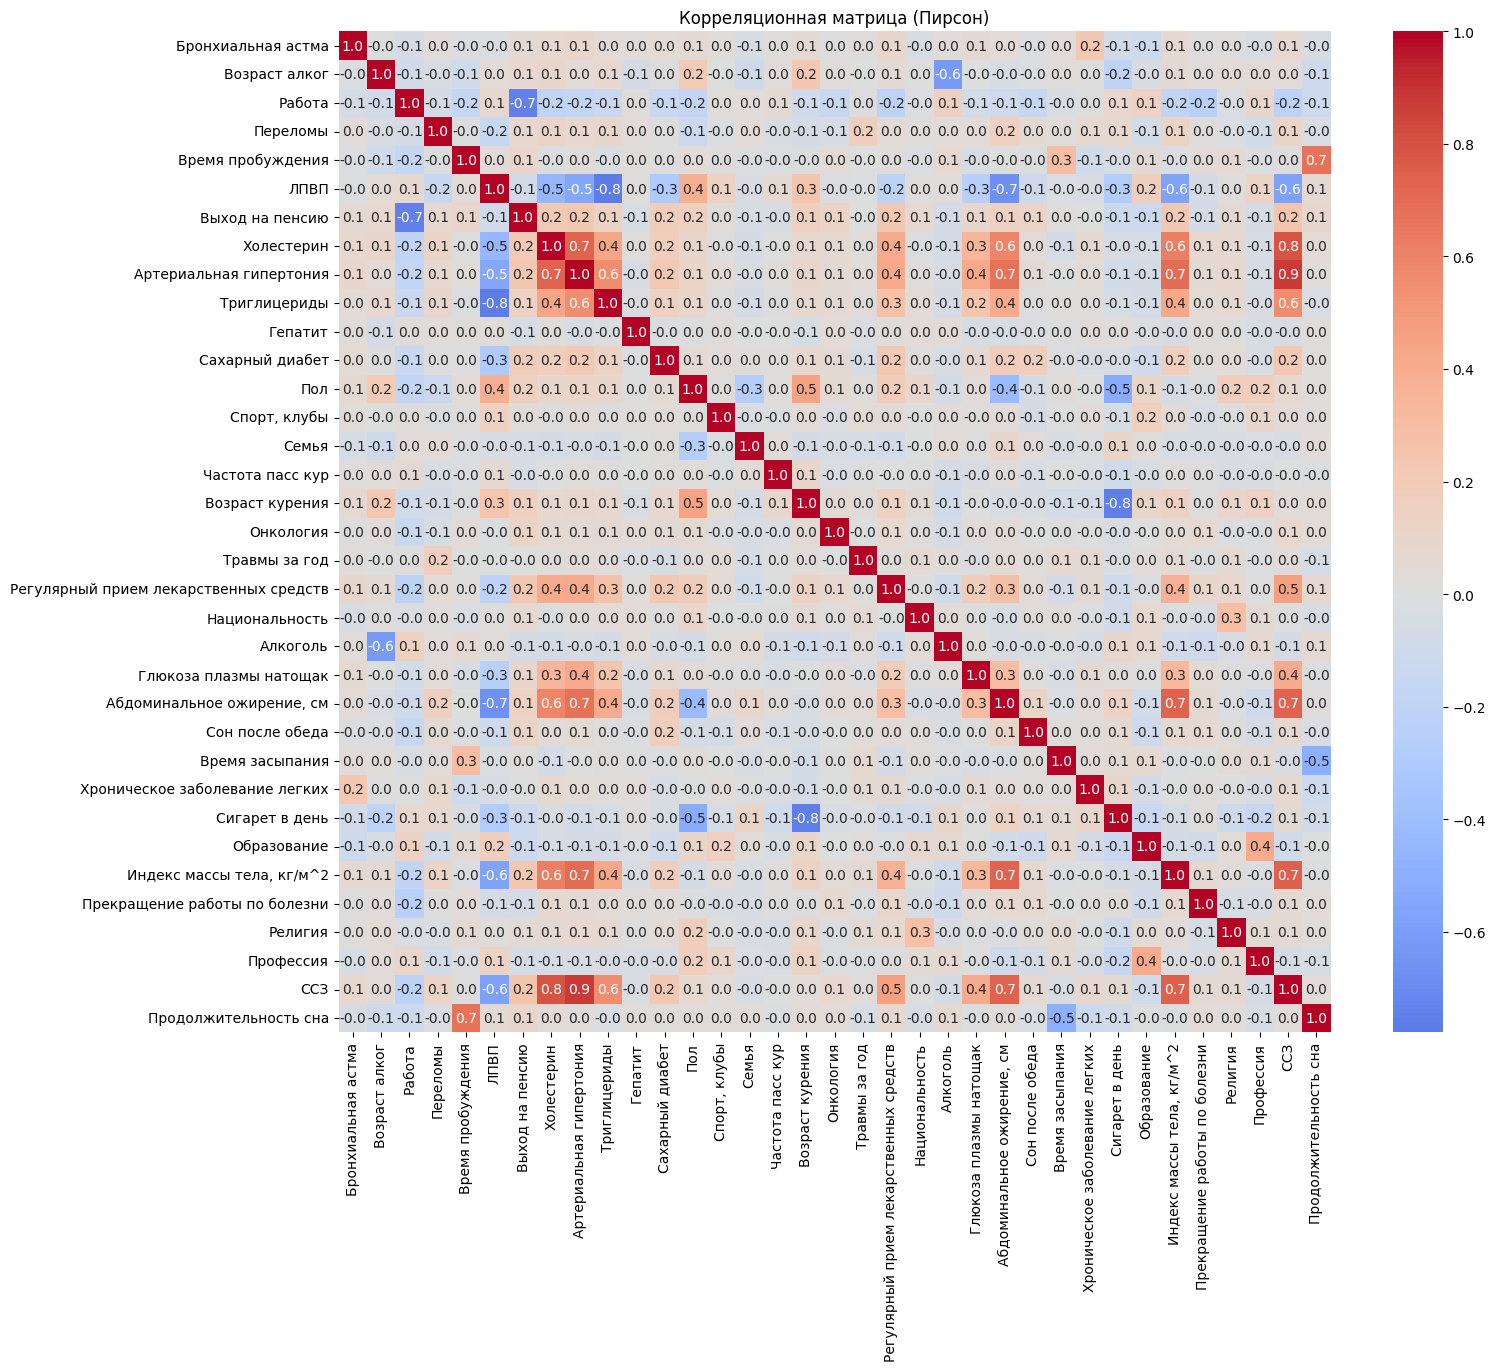

In [ ]:
plt.figure(figsize=(16,13))
sns.heatmap(corr_pearson, cmap='coolwarm', center=0, annot=True, fmt=".1f")
plt.title("Корреляционная матрица (Пирсон)")
plt.show()

# **Вывод**
**Примеры значимых корреляций**  
Сильная положительные корреляция:
- Наблюдается сильная положительная корреляция между артериальной гипертонией и холестерином (0.7), а также между артериальной гипертонией и триглицеридами (0.6).
- Существует сильная связь между индексом массы тела (ИМТ) и абдоминальным ожирением (0.7), так как оба показателя отражают степень ожирения.

Сильная отрицательная корреляция:
- Возраст курения - Образование (-0.8)
- ЛПВП - Триглицериды (-0.6)
- Сигарет в день - Образование (-0.8)

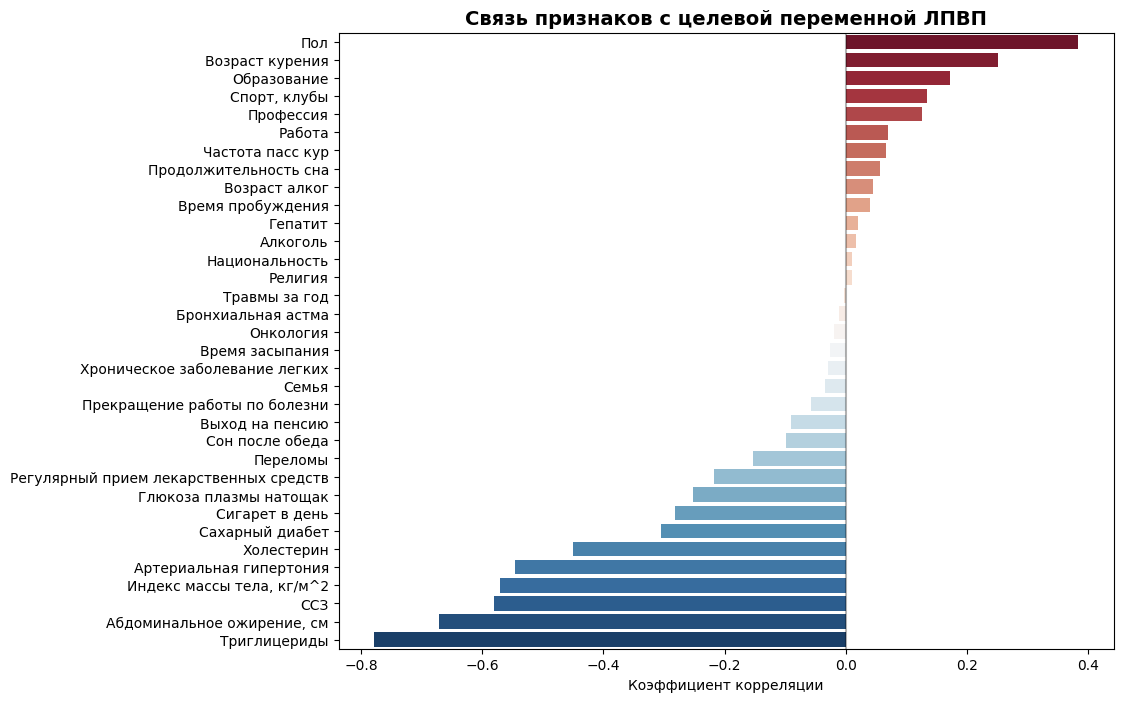

In [ ]:
target = "ЛПВП"
target_corr = corr_pearson[target].drop(target).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='RdBu')
plt.title("Связь признаков с целевой переменной ЛПВП", fontsize=14, fontweight='bold')
plt.xlabel("Коэффициент корреляции")
plt.ylabel("")
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.show()

# **Вывод**
Один из самых сильных признаков (помимо Триглицеридов), влияющий на ЛПВП -
Абдоминальное ожирение, см.  
Коэффициент корреляции = -0.75, что указывает на сильную отрицательную связь.

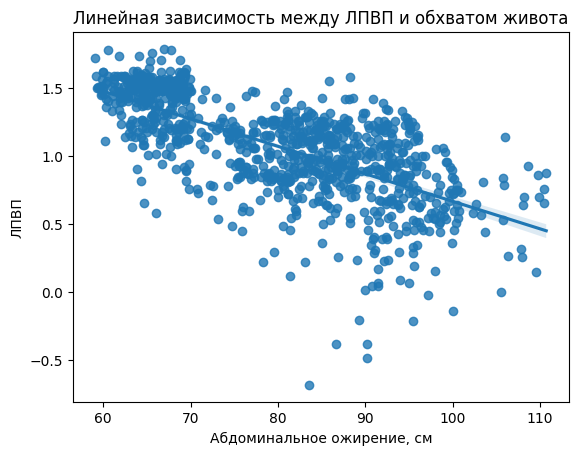

In [ ]:
sns.regplot(x="Абдоминальное ожирение, см", y="ЛПВП", data=df)
plt.title("Линейная зависимость между ЛПВП и обхватом живота")
plt.show()

# **Вывод**
На основе графика «Линейная зависимость между ЛПВП и обхватом живота» можно сделать следующий выводы:
- направление связи — отрицательное
- корреляция прослеживается
- визуально подтверждается линейная зависимость
- признак подхожит для дальнейшего прогнозирования

In [ ]:
x = df["Абдоминальное ожирение, см"]
y = df["ЛПВП"]

r, p = stats.pearsonr(x, y)
print(f"Коэффициент Пирсона: r={r:.2f}, p-value={p:.4f}")

Коэффициент Пирсона: r=-0.67, p-value=0.0000


# **Вывод**
- Коэффициент Пирсона: r=-0.67, p-value=0.0000
- Значение r = -0.671 говорит о сильной отрицательно связи.
- Очень маленькое p-value < 0.0001 означает,
что получить такую корреляцию случайно практически невозможно.
- Следовательно, зависимость между обхватом живота и уровнем ЛПВП статистически значима.

In [ ]:
corr_spearman = df.corr(numeric_only=True, method="spearman")
corr_spearman.round(2)

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
Бронхиальная астма,1.00,0.02,-0.06,0.03,-0.01,-0.02,0.06,0.07,0.08,0.04,...,0.02,0.23,-0.08,-0.11,0.06,0.00,-0.04,-0.05,0.08,-0.03
Возраст алког,0.02,1.00,-0.09,-0.05,-0.07,0.03,0.10,0.10,0.08,0.07,...,0.01,-0.02,-0.23,-0.05,0.08,0.02,0.05,0.04,0.07,-0.06
Работа,-0.06,-0.09,1.00,-0.06,-0.21,0.06,-0.74,-0.20,-0.19,-0.15,...,-0.05,0.00,0.10,0.15,-0.19,-0.24,0.02,0.10,-0.22,-0.14
Переломы,0.03,-0.05,-0.06,1.00,-0.03,-0.16,0.07,0.11,0.08,0.09,...,0.01,0.07,0.07,-0.08,0.12,0.01,0.04,-0.09,0.12,-0.05
Время пробуждения,-0.01,-0.07,-0.21,-0.03,1.00,0.04,0.13,0.00,0.03,-0.01,...,0.31,-0.09,-0.03,0.05,-0.03,0.05,0.05,-0.02,0.00,0.66
ЛПВП,-0.02,0.03,0.06,-0.16,0.04,1.00,-0.08,-0.50,-0.57,-0.71,...,-0.03,-0.02,-0.32,0.18,-0.61,-0.06,0.02,0.13,-0.61,0.07
Выход на пенсию,0.06,0.10,-0.74,0.07,0.13,-0.08,1.00,0.22,0.23,0.16,...,0.02,-0.00,-0.15,-0.13,0.22,-0.07,-0.02,-0.08,0.25,0.10
Холестерин,0.07,0.10,-0.20,0.11,0.00,-0.50,0.22,1.00,0.76,0.58,...,-0.06,0.06,-0.06,-0.06,0.63,0.06,0.02,-0.07,0.82,0.05
Артериальная гипертония,0.08,0.08,-0.19,0.08,0.03,-0.57,0.23,0.76,1.00,0.69,...,-0.01,0.05,-0.08,-0.07,0.67,0.06,0.07,-0.05,0.88,0.03
Триглицериды,0.04,0.07,-0.15,0.09,-0.01,-0.71,0.16,0.58,0.69,1.00,...,0.00,0.02,-0.04,-0.08,0.50,0.05,0.03,-0.04,0.69,-0.02


In [ ]:
x = df["Абдоминальное ожирение, см"]
y = df["ЛПВП"]

r, p = stats.spearmanr(x, y)
print(f"Коэффициент Спирмена: r={r:.2f}, p-value={p:.4f}")

Коэффициент Спирмена: r=-0.70, p-value=0.0000


In [ ]:
raznica = (corr_pearson - corr_spearman).abs()
delta = raznica > 0.15
delta_list = raznica.stack()
delta_list = delta_list[delta.stack()]

unique_pairs = delta_list[
    delta_list.index.get_level_values(0) < delta_list.index.get_level_values(1)
]

print(unique_pairs)

Уникальные пары с разницей > 0.15:
Возраст курения  Сигарет в день    0.166472
Национальность   Религия           0.184640
Алкоголь         Возраст алког     0.401209
dtype: float64


# **Вывод**
Пары признаков с наибольшими различиями в значениях с разницей в корреляции между коэффициентами > 0.15:  
- Возраст курения - Сигарет в день    0.166472  
- Алкоголь    -     Возраст алког     0.401209   
---
- В паре Возраст курения – Сигарет в день Спирмен показывает сильную отрицательную монотонную связь (−0.93), а Пирсон — слабее ( −0.76), значит, зависимость есть, но нелинейная.  
- В паре Алкоголь – Возраст алког слабый Спирмен (−0.22) и сильный Пирсон (−0.62) говорят о ложной линейной связи.
- Национальность и  Религия сравнивать не имеет смысла, это категориальные признаки

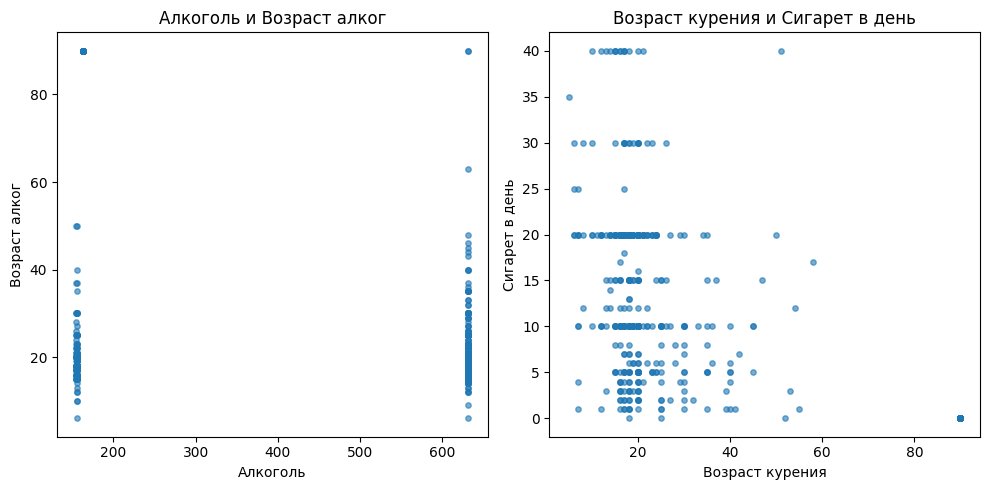

In [ ]:
pairs = [
    ('Алкоголь', 'Возраст алког'),
    ('Возраст курения', 'Сигарет в день'),
   ]


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6, s=15)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].set_title(f'{x_col} и {y_col}')

plt.tight_layout()
plt.show()

# **Вывод**
В паре Возраст курения – Сигарет в день - по графику видно, что есть сильная связь, но не линейная.
В паре Алкоголь – Возраст алког — график показывает что связь не линейная.

## Множественная линейная регрессия (4 признака)

# **Выбор признаков**
- Абдоминальное ожирение, см (-0.67) - самая сильная зависимость
- Индекс массы тела, кг/м^2 (-0.57) - антропометрический показатель
- Образование (+0.17) - социальный признак
- Пол (+0.38) - биологический признак

In [ ]:
features = [
    'Абдоминальное ожирение, см',
    'Индекс массы тела, кг/м^2',
    'Образование',
    'Пол'
]

target = 'ЛПВП'


In [ ]:
X = df[features].copy()
y = df[target].copy()

# 1) Разделение на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 2) Обучаем скейлер на train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3) Применяем тот же скейлер к test
X_test_scaled = scaler.transform(X_test)

# (опционально) оборачиваем обратно в DataFrame — удобнее смотреть и маппить коэффициенты по названиям
X_train_s = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_s  = pd.DataFrame(X_test_scaled,  columns=features, index=X_test.index)

In [ ]:
X_train_s.round(2)

,"Абдоминальное ожирение, см","Индекс массы тела, кг/м^2",Образование,Пол
935,0.07,-0.35,-2.91,-1.53
290,-1.40,-0.91,-0.16,0.66
544,-1.09,-0.82,1.21,0.66
275,1.34,0.54,1.21,-1.53
109,-1.21,-0.68,-0.16,0.66
...,...,...,...,...
106,-0.16,-0.72,-1.54,-1.53
270,-0.41,0.03,-1.54,-1.53
860,-1.31,-0.64,1.21,0.66
435,0.81,0.40,-2.91,0.66


In [ ]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train_s, y_train)

intercept = lin.intercept_
coefs = pd.Series(lin.coef_, index= features)

print(f"Свободный член (b0): {intercept:.3f}")

coef_table = (
    pd.DataFrame({
        "Коэффициент": coefs,
        "|Коэф.|": coefs.abs()
    })
    .sort_values("|Коэф.|", ascending=False)
)

coef_table

Свободный член (b0): 1.068


,Коэффициент,|Коэф.|
"Абдоминальное ожирение, см",-0.141595,0.141595
"Индекс массы тела, кг/м^2",-0.099169,0.099169
Пол,0.076647,0.076647
Образование,0.034849,0.034849


In [ ]:
# Свободный член и коэффициенты
intercept = lin.intercept_
coefs = pd.Series(lin.coef_, index=features)

print("Свободный член (b0):", round(intercept, 3))
print()

print("Коэффициенты модели:")
display(coefs.to_frame("Коэффициент").round(3))

# Формирование уравнения модели
terms = [f"{coefs[f]:.3f}·{f}" for f in features]
equation = f"{target} = {intercept:.3f} + " + " + ".join(terms)

print("\nУравнение модели:\n")
print(equation)

Свободный член (b0): 1.068

Коэффициенты модели:


,Коэффициент
"Абдоминальное ожирение, см",-0.142
"Индекс массы тела, кг/м^2",-0.099
Образование,0.035
Пол,0.077



Уравнение модели:

ЛПВП = 1.068 + -0.142·Абдоминальное ожирение, см + -0.099·Индекс массы тела, кг/м^2 + 0.035·Образование + 0.077·Пол


In [ ]:
# Предсказания
y_pred = lin.predict(X_test_s)

# Метрики
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²  = {r2:.3f}")
print(f"MAE = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")



R²  = 0.431
MAE = 0.213
RMSE = 0.288


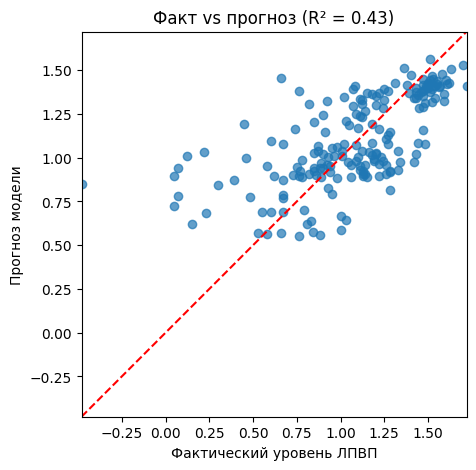

In [ ]:
# График "факт vs прогноз"
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.7)
lims = [
    min(min(y_test), min(y_pred)),
    max(max(y_test), max(y_pred))
]
plt.plot(lims, lims, linestyle="--", color="red")

plt.xlabel("Фактический уровень ЛПВП")
plt.ylabel("Прогноз модели")
plt.title(f"Факт vs прогноз (R² = {r2:.2f})")

plt.xlim(lims)
plt.ylim(lims)
plt.gca().set_aspect('equal')

plt.show()

# **Вывод**
Качество модели можно оценить по трём метрикам, рассчитанным на тестовой выборке:

- **R² = 0.431**  
  Модель объясняет 43% дисперсии ЛПВП.  
  Это среднее качество: существенная часть изменений объясняется,  
  но заметная доля остаётся вне модели — что логично для простой линейной регрессии  
  с небольшим количеством признаков.
- **MAE = 0.213**  
  В среднем модель ошибается в среднем на **0.213 единиц измерения**,  
  что является приемлемым уровнем точности.
- **RMSE = 0.288**  
  Средний размер ошибки чуть выше из-за нескольких выбросов.

График «факт vs прогноз» показывает, что точки в целом располагаются недалеко от диагонали,  
однако присутствует разброс.  
Это подтверждает, что линейная регрессия улавливает общую тенденцию, но не все особенности данных.

В целом модель демонстрирует **умеренное качество**: она подходит для грубой оценки тенденций, но не для точных прогнозов.

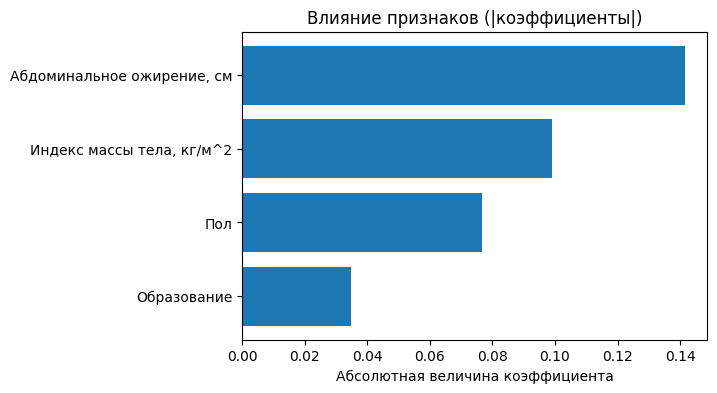

In [ ]:
# Коэффициенты по убыванию абсолютного значения
coef_table = (
    pd.DataFrame({
        "Коэффициент": lin.coef_,
    }, index=features)
    .assign(Абсолютный=lambda x: x["Коэффициент"].abs())
    .sort_values("Абсолютный", ascending=True)
)

plt.figure(figsize=(6,4))
plt.barh(coef_table.index, coef_table["Абсолютный"])
plt.title("Влияние признаков (|коэффициенты|)")
plt.xlabel("Абсолютная величина коэффициента")
plt.show()

# **Вывод**
- Абдоминальное ожирение - сильнее всего отрицательно влияет ЛПВП
- Индекс массы тела - также значительно отрицательно влияет на ЛПВП
- Пол - влияет на ЛПВП, но в меньшей степени, влияние положительное
- Образование - слабее всего положительно влияет на ЛПВП

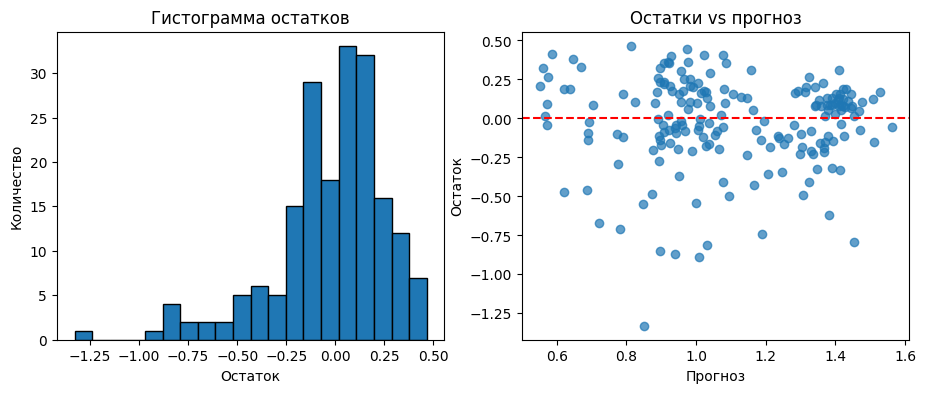

In [ ]:
# Остатки
residuals = y_test - y_pred

fig, ax = plt.subplots(1, 2, figsize=(11,4))

# Гистограмма остатков
ax[0].hist(residuals, bins=20, edgecolor="black")
ax[0].set_title("Гистограмма остатков")
ax[0].set_xlabel("Остаток")
ax[0].set_ylabel("Количество")

# Остатки vs прогноз
ax[1].scatter(y_pred, residuals, alpha=0.7)
ax[1].axhline(0, color="red", linestyle="--")
ax[1].set_title("Остатки vs прогноз")
ax[1].set_xlabel("Прогноз")
ax[1].set_ylabel("Остаток")

plt.show()

# "Мужская модель" линейной регрессии

In [ ]:


df_0 = df[df['Пол'] == 0]
features = [
    'Абдоминальное ожирение, см',
    'Индекс массы тела, кг/м^2',
    'Образование',
]

target = 'ЛПВП'

X = df_0[features].copy()
y = df_0[target].copy()

# 1) Разделение на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 2) Обучаем скейлер на train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3) Применяем тот же скейлер к test
X_test_scaled = scaler.transform(X_test)

# (опционально) оборачиваем обратно в DataFrame — удобнее смотреть и маппить коэффициенты по названиям
X_train_s = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_s  = pd.DataFrame(X_test_scaled,  columns=features, index=X_test.index)

from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train_s, y_train)



LinearRegression()

In [ ]:
# Свободный член и коэффициенты
intercept = lin.intercept_
coefs = pd.Series(lin.coef_, index=features)

print("Свободный член (b0):", round(intercept, 3))
print()

print("Коэффициенты модели:")
display(coefs.to_frame("Коэффициент").round(3))

# Формирование уравнения модели
terms = [f"{coefs[f]:.3f}·{f}" for f in features]
equation = f"{target} = {intercept:.3f} + " + " + ".join(terms)

print("\nУравнение модели:\n")
print(equation)

Свободный член (b0): 0.854

Коэффициенты модели:


,Коэффициент
"Абдоминальное ожирение, см",-0.073
"Индекс массы тела, кг/м^2",-0.145
Образование,0.034



Уравнение модели:

ЛПВП = 0.854 + -0.073·Абдоминальное ожирение, см + -0.145·Индекс массы тела, кг/м^2 + 0.034·Образование


In [ ]:
# Предсказания
y_pred = lin.predict(X_test_s)

# Метрики
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²  = {r2:.3f}")
print(f"MAE = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")

R²  = 0.520
MAE = 0.163
RMSE = 0.207


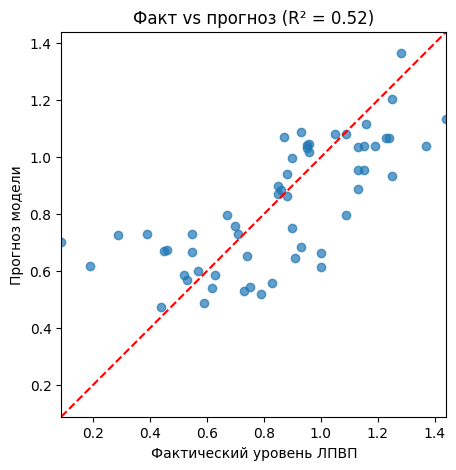

In [ ]:
# График "факт vs прогноз"
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.7)
lims = [
    min(min(y_test), min(y_pred)),
    max(max(y_test), max(y_pred))
]
plt.plot(lims, lims, linestyle="--", color="red")

plt.xlabel("Фактический уровень ЛПВП")
plt.ylabel("Прогноз модели")
plt.title(f"Факт vs прогноз (R² = {r2:.2f})")

plt.xlim(lims)
plt.ylim(lims)
plt.gca().set_aspect('equal')

plt.show()

## Вывод
**Сравнение с общей моделью**  

Модель, построенная только на данных мужчин, демонстрирует умеренно высокое качество предсказания ЛПВП:

- R² = 0.520 — объясняет более половины дисперсии целевой переменной, что свидетельствует о сильной связи между метаболическими факторами и уровнем ЛПВП у мужчин.
- MAE = 0.163 — средняя ошибка прогноза составляет 0.163 ммоль/л, что является приемлемым уровнем точности оценки.
- RMSE = 0.207 — чуть выше MAE, что указывает на наличие небольшого числа выбросов, но в целом модель стабильна.

Сравнение с моделью только для мужчин показывает, что при разделении признака качество модели значительно улучшается:
-  R² растёт, MAE снижается, RMSE также снижается

# "Женская модель" линейной регрессии

In [ ]:
df_1 = df[df['Пол'] == 1]
features = [
    'Абдоминальное ожирение, см',
    'Индекс массы тела, кг/м^2',
    'Образование',
]

target = 'ЛПВП'

X = df_1[features].copy()
y = df_1[target].copy()

# 1) Разделение на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 2) Обучаем скейлер на train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3) Применяем тот же скейлер к test
X_test_scaled = scaler.transform(X_test)

# (опционально) оборачиваем обратно в DataFrame — удобнее смотреть и маппить коэффициенты по названиям
X_train_s = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_s  = pd.DataFrame(X_test_scaled,  columns=features, index=X_test.index)

from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
intercept = lin.intercept_
coefs = pd.Series(lin.coef_, index=features)

print("Свободный член (b0):", round(intercept, 3))
print()

print("Коэффициенты модели:")
display(coefs.to_frame("Коэффициент").round(3))

# Формирование уравнения модели
terms = [f"{coefs[f]:.3f}·{f}" for f in features]
equation = f"{target} = {intercept:.3f} + " + " + ".join(terms)

print("\nУравнение модели:\n")
print(equation)

Свободный член (b0): 1.162

Коэффициенты модели:


,Коэффициент
"Абдоминальное ожирение, см",-0.121
"Индекс массы тела, кг/м^2",-0.109
Образование,0.030



Уравнение модели:

ЛПВП = 1.162 + -0.121·Абдоминальное ожирение, см + -0.109·Индекс массы тела, кг/м^2 + 0.030·Образование


In [ ]:
y_pred = lin.predict(X_test_s)

# Метрики
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²  = {r2:.3f}")
print(f"MAE = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")

R²  = 0.438
MAE = 0.202
RMSE = 0.268


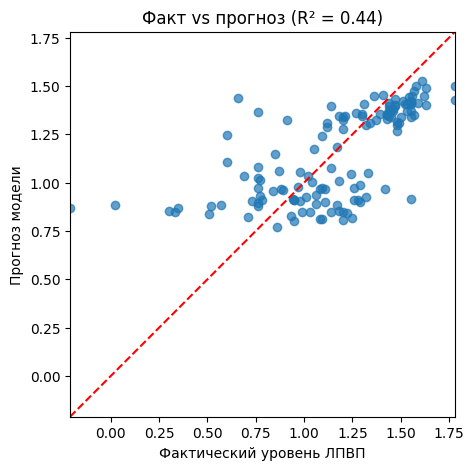

In [ ]:
# График "факт vs прогноз"
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.7)
lims = [
    min(min(y_test), min(y_pred)),
    max(max(y_test), max(y_pred))
]
plt.plot(lims, lims, linestyle="--", color="red")

plt.xlabel("Фактический уровень ЛПВП")
plt.ylabel("Прогноз модели")
plt.title(f"Факт vs прогноз (R² = {r2:.2f})")

plt.xlim(lims)
plt.ylim(lims)
plt.gca().set_aspect('equal')

plt.show()

## **Вывод**  
Модель, построенная только на данных женщин, демонстрирует хорошее качество предсказания ЛПВП:

- R² = 0.438 — объясняет около 44% дисперсии целевой переменной, что свидетельствует о заметной связи между метаболическими факторами и уровнем ЛПВП у женщин.
- MAE = 0.202 — средняя ошибка прогноза составляет 0.202 ммоль/л, что является приемлемым уровнем точности для клинической оценки.
- RMSE = 0.268 — несколько выше MAE, что указывает на наличие ограниченного числа выбросов, но в целом модель остается стабильной.


**Сравнение мужской и женской моделей**

- R² мужской модели существенно выше (0.520 против 0.438 у женской), что свидетельствует о лучшей объясняющей способности модели для мужской популяции

- MAE мужской модели значительно ниже (0.163 против 0.202 у женской), что указывает на более высокую точность прогнозов

- RMSE мужской модели также ниже (0.207 против 0.268 у женской), подтверждая лучшую сходимость модели с данными

**Сравнение с общей моделью**

- R² практически не меняется (0.438 против 0.431 в общей модели), что указывает на схожую объясняющую способность.
- MAE снижается (0.202 против 0.213), что означает повышение точности прогнозов для женской подвыборки.
- RMSE также снижается (0.268 против 0.288), подтверждая улучшение работы модели.

# **Вывод общий по регрессии**
- Создание отдельных моделей для полов является значимым решением.   
- Мужская (R²=0.520, MAE=0.163) и женская (R²=0.438, MAE=0.202) модели либо точнее, либо сопоставимы с общей (R²=0.431, MAE=0.213)

При создании разделленых по полу моделей выявлена важное наблюдение:
- У мужчин доминирующим негативным фактором выступает ИМТ (-0.145)
- У женщин наибольшее влияние оказывает абдоминальное ожирение (-0.121)

Вывод ключевой

Каждая из моделей оптимальна для своей целевой группы и подчеркивает разные биологические или поведенческие механизмы регуляции ЛПВП у мужчин и женщин, что является важным принципом при оценке индивидуальных особеноостей.

Общая модель не является хуже или лучше, она также имеет важность при оценке общих тенденций и зависимостей.